In [2]:
%matplotlib inline
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lena = misc.imread('images/LENA_512.jpg')
ship = misc.imread('images/statek_640_505.jpg')
wir = misc.imread('images/WIR_360.jpg')

In [4]:
def greyscale(picture):
    grey_picture = np.copy(picture)
    for row in grey_picture:
        for col in row:
            col[0] = col[1] = col[2] = (int(col[0]) + int(col[1]) + int(col[2]))/3
    return grey_picture

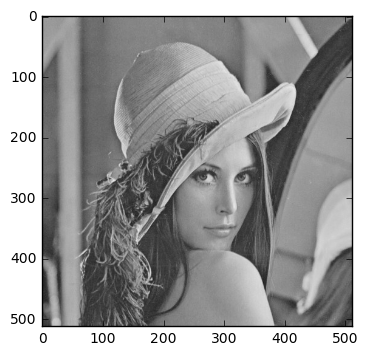

In [5]:
grey_lena = greyscale(lena)
plt.imshow(grey_lena)
plt.show()


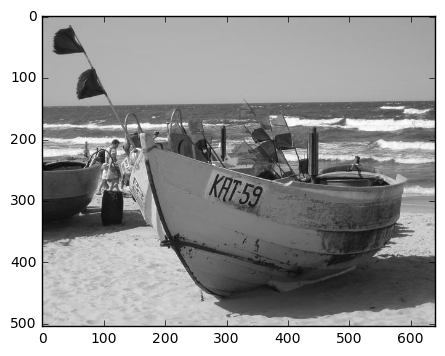

In [6]:
grey_ship = greyscale(ship)
plt.imshow(grey_ship)
plt.show()

In [7]:
def sepia(picture, w=30):
    sepia_picture = greyscale(picture)
    for row in sepia_picture:
        for col in row:
            col[0] = min(col[0] + 2*w, 255)
            col[1] = min(col[1] + w, 255)
    return sepia_picture

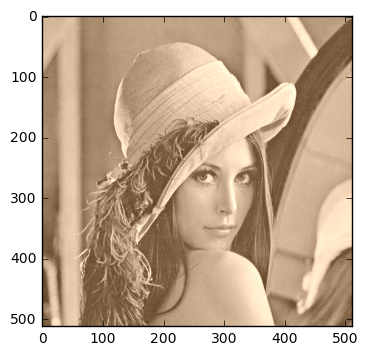

In [8]:
lena_sepia = sepia(lena)
plt.imshow(lena_sepia)
plt.show()

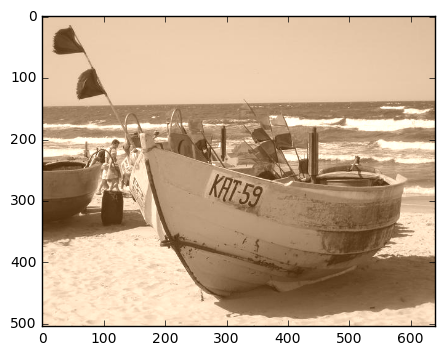

In [9]:
ship_sepia = sepia(ship)
plt.imshow(ship_sepia)
plt.show()

In [10]:
def negative(picture):
    negative_picture = np.copy(picture)
    for row in negative_picture:
        for col in row:
            col[0] = 255 - col[0]
            col[1] = 255 - col[1]
            col[2] = 255 - col[2]
    return negative_picture

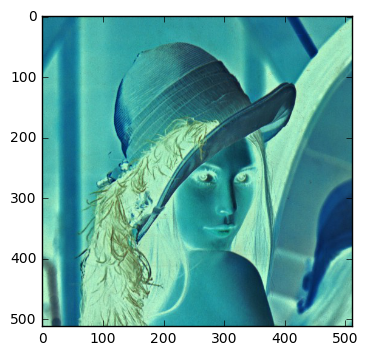

In [11]:
lena_negative = negative(lena)
plt.imshow(lena_negative)
plt.show()

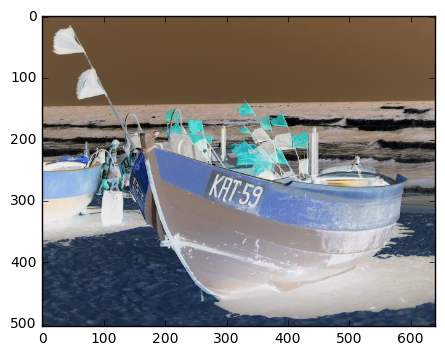

In [12]:
ship_negative = negative(ship)
plt.imshow(ship_negative)
plt.show()

In [13]:
def rotate(picture, angle):
    #angle = angle * np.pi / 180.
    rotated_picture = np.full(np.shape(picture), 255, dtype=np.uint8)
    length, width, _ = np.shape(picture)
    srodekL = length/2
    srodekW = width/2
    for x, row in enumerate(picture):
        for y, col in enumerate(row):
            x2 = int(x * np.cos(angle) - y * np.sin(angle)) 
            y2 = int(x * np.sin(angle) + y * np.cos(angle)) 
            if x2 >= 0 and y2 >= 0 and y2 < width and x2 < length:
                rotated_picture[x2, y2] = col
    rotated_picture = ndimage.rotate(picture, angle)
    return rotated_picture


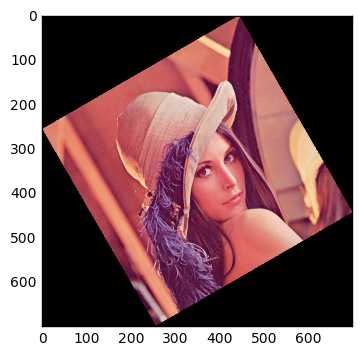

In [14]:
rotated_lena = rotate(lena, 30)
plt.imshow(rotated_lena)
plt.show()

In [15]:
def move(picture, z):
    moved_picture = np.full(np.shape(picture), 255, dtype=np.uint8)
    length, width, _ = np.shape(picture)
    for x, row in enumerate(picture):
        for y, col in enumerate(row):
            new_x = x
            new_y = (y + z)%width
            if new_x >= 0 and new_y >= 0 and new_y < width and new_x < length:
                moved_picture[new_x, new_y] = col
        
    return moved_picture

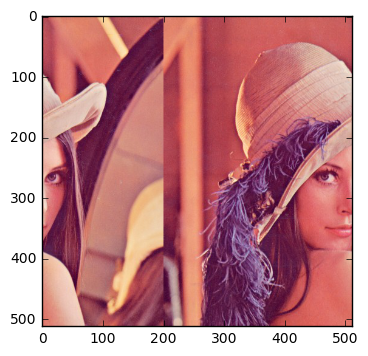

In [16]:
moved_lena = move(lena, 200)
plt.imshow(moved_lena)
plt.show()

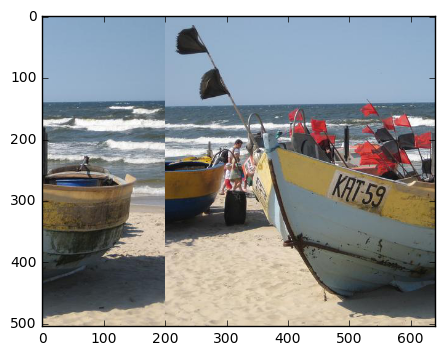

In [17]:
moved_ship = move(ship, 200)
plt.imshow(moved_ship)
plt.show()

In [18]:
def grey_level(picture, B):
    new_picture = np.full(np.shape(picture), 255, dtype=np.uint8)
    LUT = [0 for _ in xrange(256)]
    delta = 2**(8-B)
    for i, _ in enumerate(LUT):
        LUT[i] = np.floor(max((i-(delta/2)-1)/delta,0))*delta+(delta/2-1)
    for x, row in enumerate(picture):
        for y, col in enumerate(row):
            i, _, _ = picture[x, y]
            new_picture[x, y] = (LUT[i], LUT[i], LUT[i])
    return new_picture

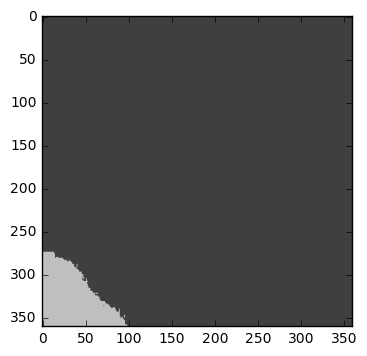

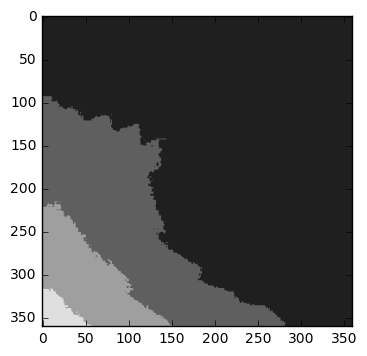

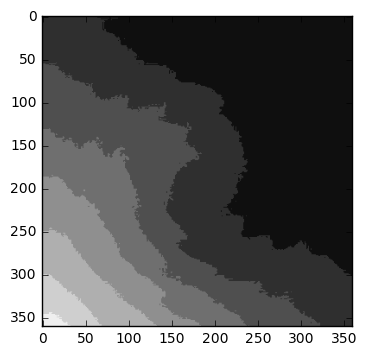

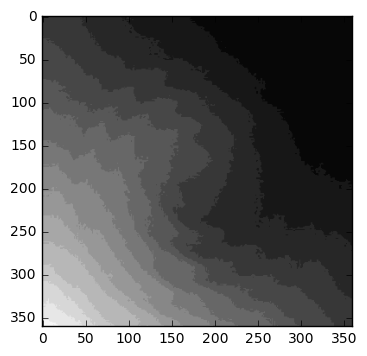

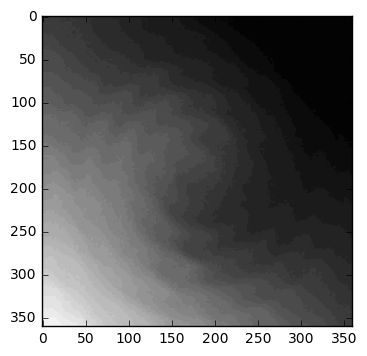

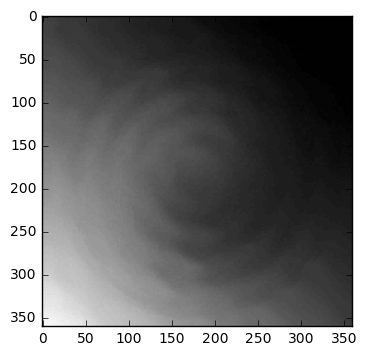

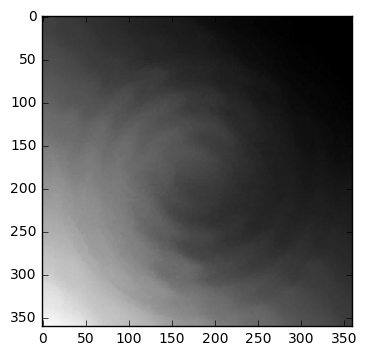

In [19]:
for b in range(1,8):
    plt.imshow(grey_level(wir, b))
    plt.show()

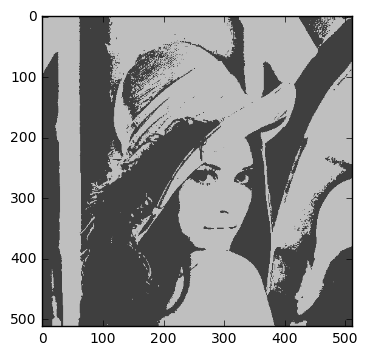

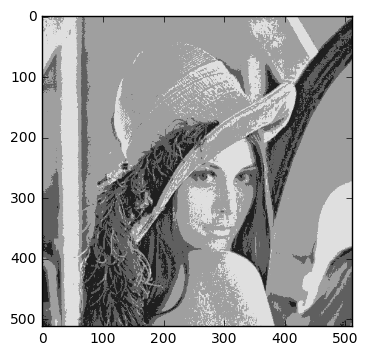

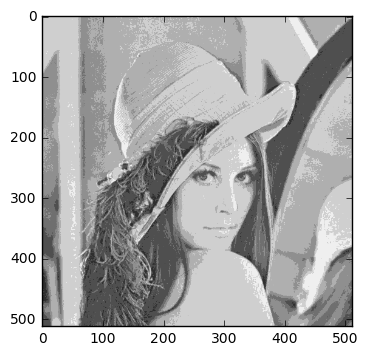

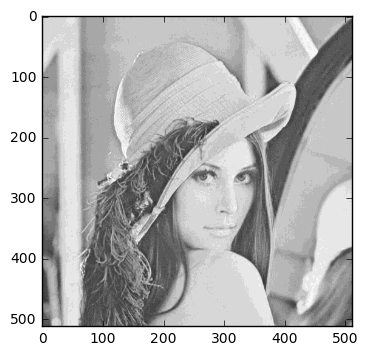

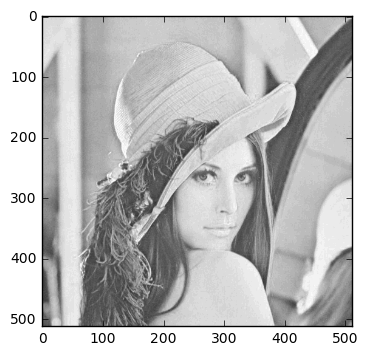

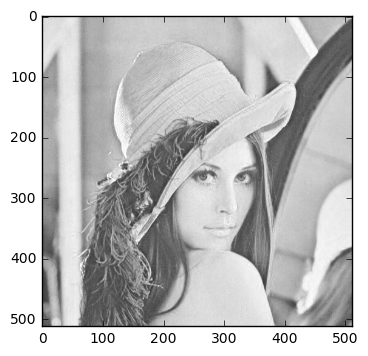

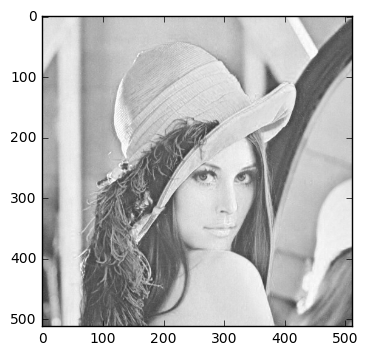

In [24]:
for b in range(1,8):
    plt.imshow(grey_level(lena, b))
    plt.show()